/tmp/ipykernel_639527/3011417086.py:87: FutureWarning: The 'sizes' parameter has been deprecated since v0.4.0 and will be removed in v0.6.0. Please use 'size' instead.
  fig.plot(


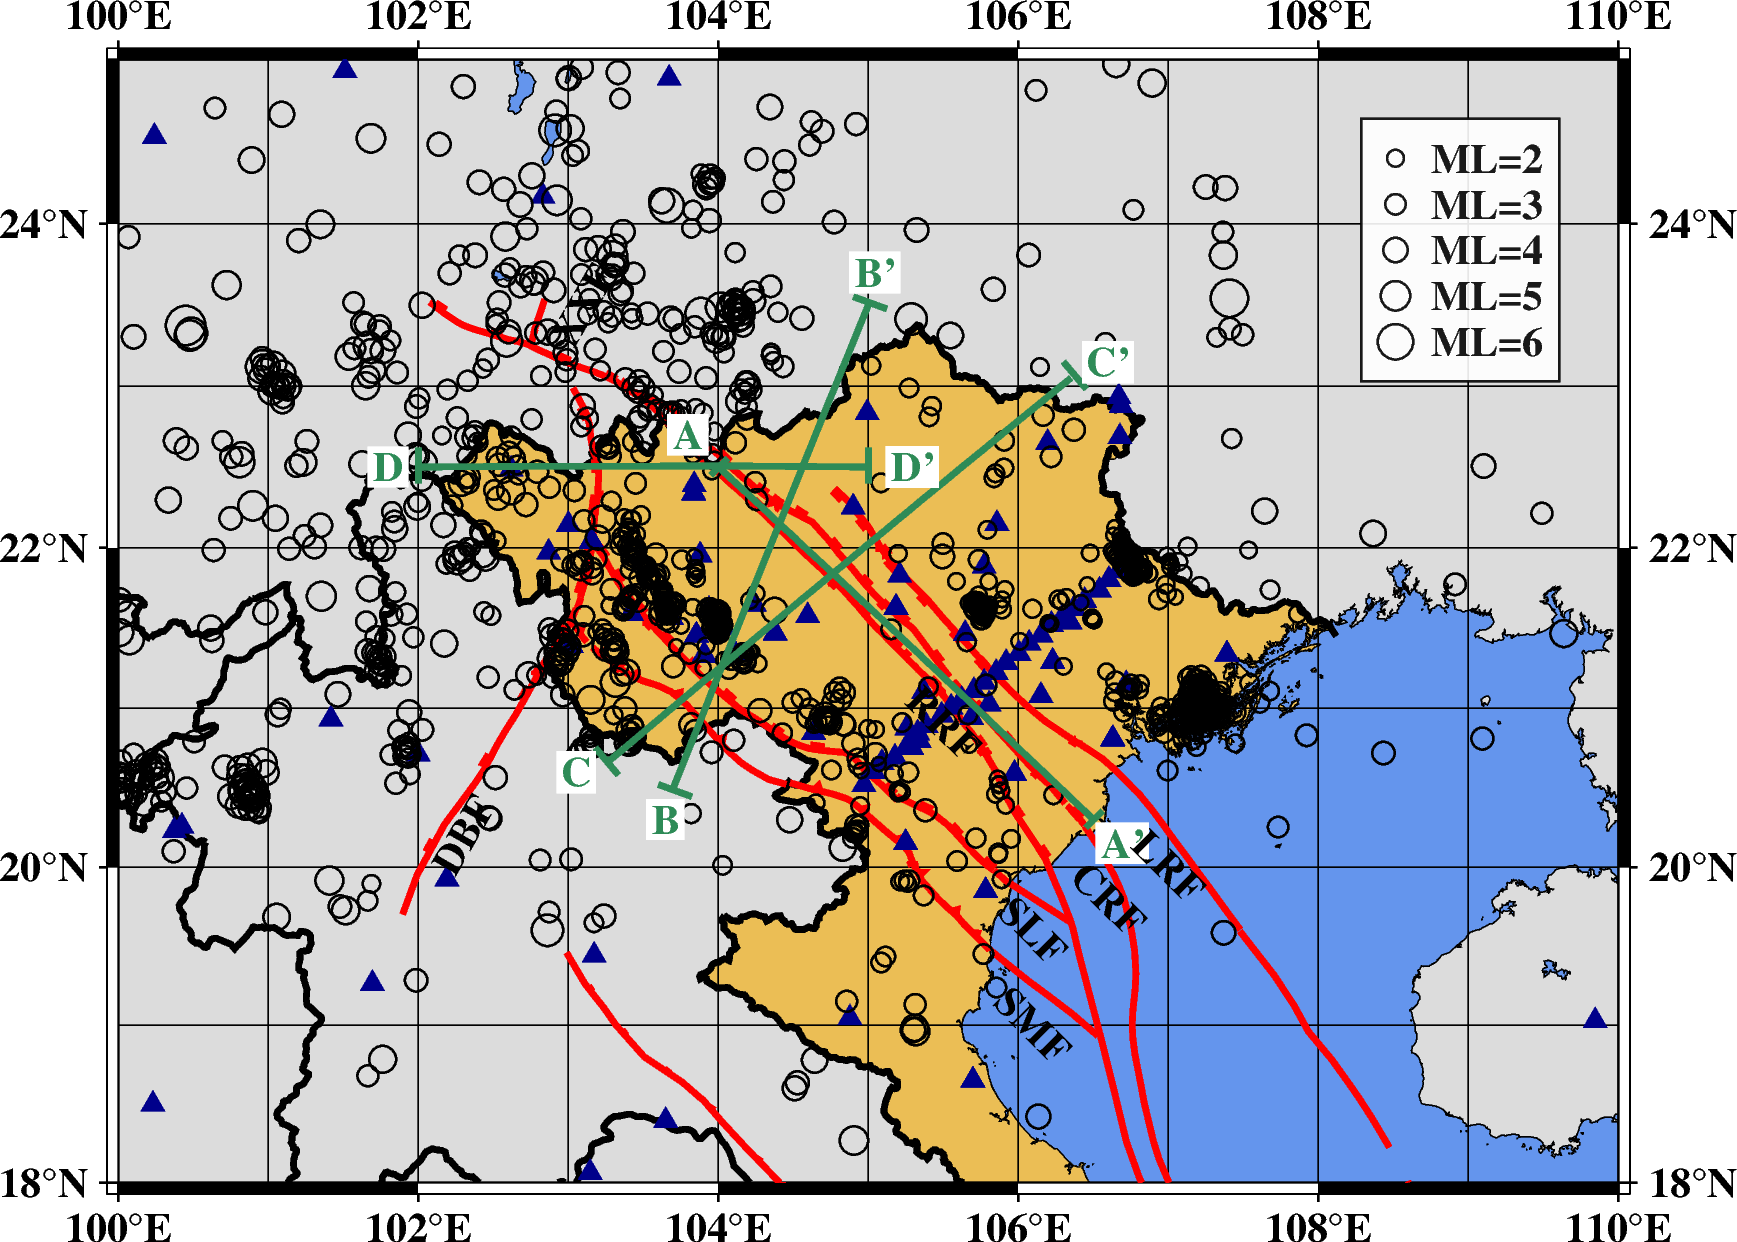

In [3]:
# =================================================================================================================
## Figure 2: Seismicity of North VN and surrounding area
# Version 2:
# Reclaim for manuscript - remove background topographic and change to figure 2
#==================================================================================================================
import os
import pygmt
import pandas as pd
import numpy as np
import obspy
from obspy import read
from glob import glob
import matplotlib.pyplot as plt
from obspy.clients.iris import Client
from obspy.core import Stream
# ============================== Import the data =======================================
## Input Catalog combined of IGP and international agencies for tomography
cata = pd.read_csv("catalog_VN//00_evt_tomo.in",
                   skiprows=0,
                   usecols=range(0,10),
                   delim_whitespace=True,
                   #names=None
                   names=["date","time","lat","long","dep","mag","erh","erz","rms","id"]
                   )
# cata.head()
#
## Stations
stas = pd.read_csv("Tomoppndata//00_sta",
                      delim_whitespace=True,
                      names=["name","lat","long","elv","res1","res2"]
)
# stas.head()
# ============================== Plot ===============================================
fig = pygmt.Figure()

# Figure setting
minlon, maxlon = 100, 110
minlat, maxlat = 18, 25

# Config the figure 
pygmt.config(FONT_LABEL="13p,Times-Bold,black")
pygmt.config(FONT_TITLE="13p,Times-Bold,black")
pygmt.config(FONT_ANNOT_PRIMARY="10p,Times-Bold,black")
pygmt.config(FONT_ANNOT_SECONDARY="10p,Times-Roman,black")
#
grid = pygmt.datasets.load_earth_relief(resolution="30s", region=[100, 110, 18, 25])
#
fig.coast(
    region=[minlon, maxlon, minlat, maxlat],
    projection='M5i',
#    projection='X10i/5i',
    shorelines=True,
    frame=["a2g1.0","NSWE"],
    water="cornflowerblue",
#     land="lightgray",
    land="gainsboro",
    dcw="VN+glightbrown+p0.2p",
#     Td=["jCM","+w5c","+pthicker,#306998","+t361/30/15"],
#         "jCM",  # Plot compass on Center Middle
#         "+w5c",  # Width of 5 centimeter
#         "+pthicker,#306998",  # Python 'blue' ring
#         "+t361/30/15",  # Label compass ticks every 361, 30 and 15 degrees
#         "+o0.2c"
#     Td=["jTL+w2c+o0.2c+pthicker+t361/30/15"], # Compass
    borders=["1/1.5p,black","2/1.5p,black","3/1.5p,black"],
)
# Fault system
fig.plot(data="faults_VN/fault_lv1.txt", 
         pen="1.5,red",
#          label='"Major faults"'
        )
# fig.plot(data="faults_VN/fault_lv2.txt", 
#          pen="1.0,lightblue",
# #          label='"Minor fault"'
#         )
# Stations
fig.plot(
    x=stas.long,
    y=stas.lat,
    style="t0.08i",
    color="darkblue",
    pen="0.5p,darkblue"
)
# Background seismicity
pygmt.makecpt(cmap="seis", series=(0,50,1),reverse=True)
# Catalog
fig.plot(
    y=cata.lat,
    x=cata.long,
    sizes=0.1*1.2**cata.mag,
#     color=cata.dep,
#     cmap=True,
    style="cc",
    pen="0.5p,black"
)
#
for m in [2,3,4,5,6]:
    mag = 0.1*1.2**m
    fig.plot(
        x=[0],
        y=[0],
        #color="mediumpurple",
        style='c{}'.format(mag), 
        pen='0.5p,black',label="ML={}".format(m)
    )
fig.legend(position='JTR+jTR+o0.5c/0.5c',box='+gwhite+p0.5p',transparency=10)
# fig.colorbar(
#     frame=['xa10f50+l"Focal depth"', "ya50f10+l(km)"],
# #    position="JML+o2c/3.95c+w-5c/0.3c+n+mc",
#     position="JTR+jTR+o1.5c/0.5c+w-3.0c/0.12c",
#     box='+glightyellow+p1p',
#     transparency=10
# )
################################
# Profile line
# Main profile along the RRSZ
# A
fig.plot(x=[104.0, 106.5],y=[22.50, 20.30],pen='1.5p,seagreen')

fig.plot(x=103.95, y=22.45,style="v0.2c",pen="1.5p,seagreen",direction=[[45],[0.2]])
fig.plot(x=106.45, y=20.25,style="v0.2c",pen="1.5p,seagreen",direction=[[45],[0.2]])

fig.text(text="A", x=103.8, y=22.70,angle=0,font="10p,Times-Bold,seagreen",fill='white')
fig.text(text="A'", x=106.7, y=20.15,angle=0,font="10p,Times-Bold,seagreen",fill='white')

# B
fig.plot(x=[103.7, 105.0],y=[20.50, 23.50],pen='1.5p,seagreen')

fig.plot(x=103.6, y=20.52,style="v0.2c",pen="1.5p,seagreen",direction=[[-20],[0.3]])
fig.plot(x=104.9, y=23.55,style="v0.2c",pen="1.5p,seagreen",direction=[[-20],[0.3]])

fig.text(text="B", x=103.65, y=20.30,angle=0,font="10p,Times-Bold,seagreen",fill='white')
fig.text(text="B'", x=105.05, y=23.70,angle=0,font="10p,Times-Bold,seagreen",fill='white')

# C
fig.plot(x=[103.25, 106.35],y=[20.65, 23.05],pen='1.5p,seagreen')

fig.plot(x=103.18, y=20.75,style="v0.2c",pen="1.5p,seagreen",direction=[[-50],[0.3]])
fig.plot(x=106.30, y=23.15,style="v0.2c",pen="1.5p,seagreen",direction=[[-50],[0.3]])

fig.text(text="C", x=103.05, y=20.60,angle=0,font="10p,Times-Bold,seagreen",fill='white')
fig.text(text="C'", x=106.60, y=23.15,angle=0,font="10p,Times-Bold,seagreen",fill='white')

# D
fig.plot(x=[102.0, 105.0],y=[22.50, 22.50],pen='1.5p,seagreen')

fig.plot(x=102.0, y=22.40,style="v0.2c",pen="1.5p,seagreen",direction=[[90],[0.3]])
fig.plot(x=105.0, y=22.40,style="v0.2c",pen="1.5p,seagreen",direction=[[90],[0.3]])

fig.text(text="D", x=101.8, y=22.50,angle=0,font="10p,Times-Bold,seagreen",fill='white')
fig.text(text="D'", x=105.3, y=22.50,angle=0,font="10p,Times-Bold,seagreen",fill='white')
#
fig.text(text="XXF", x=103.1, y=23.5,angle=60,
         font="10p,Times-Bold,black",fill=None)
fig.text(text="SMF", x=106.1, y=19.0,angle=-45,
         font="10p,Times-Bold,black",fill=None)
fig.text(text="CRF", x=106.6, y=19.8,angle=-45,
         font="10p,Times-Bold,black",fill=None)
fig.text(text="LRF", x=107.0, y=20.0,angle=-45,
         font="10p,Times-Bold,black",fill=None)
fig.text(text="SLF", x=106.1, y=19.6,angle=-45,
         font="10p,Times-Bold,black",fill=None)
fig.text(text="RRF", x=105.5, y=20.9,angle=-45,
         font="10p,Times-Bold,black",fill=None)
fig.text(text="DBF", x=102.3, y=20.2,angle=60,
         font="10p,Times-Bold,black",fill=None)
# fig.text(text="DNCV", x=104.6, y=22.0,angle=-45,
#          font="10p,Times-Bold,black",fill=None)
# fig.text(text="(b)", x=101.0, y=18.5,angle=00,font="15p,Times-Bold,black",fill='white')
# Print out
fig.savefig("02.Seismicity.png",crop=True, dpi=1000, transparent=True)
# fig.show(method='external')
fig.show()